# Introduction aux `dataframe`

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/vincent/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vincent/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
plt.style.use("seaborn")

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

## Construction de `dataframe`

Les `DataFrame` ont des colonnes homogènes, on peut les construire d'au moins deux façons.

### Par passage de dictionnaires

In [5]:
dico = {"col1" : [1,2,3,4],
        "col2" : [5,6,7,8],
        "col3" : ["a","b","c","d"]
       }

In [6]:
df = pd.DataFrame(dico)
df

,col1,col2,col3
0,1,5,a
1,2,6,b
2,3,7,c
3,4,8,d


### Par passage d'une structure rectangulaire

In [7]:
df = pd.DataFrame([[1, 5, "a"],
                   [2, 6, "b"],
                   [3, 7, "c"],
                   [3, 8, "d"]
                  ],
                  columns = ["col1", "col2", "col3"]
                 )
df

,col1,col2,col3
0,1,5,a
1,2,6,b
2,3,7,c
3,3,8,d


In [8]:
df = pd.DataFrame(np.random.rand(10, 5), columns = list("abcde"))
df

,a,b,c,d,e
0,0.110653,0.568520,0.185340,0.183847,0.633781
1,0.964661,0.137229,0.012545,0.050871,0.628462
2,0.963459,0.604635,0.003954,0.039511,0.603213
3,0.543266,0.433908,0.756947,0.229256,0.969632
4,0.001124,0.963420,0.328075,0.308002,0.209550
5,0.632317,0.708996,0.201776,0.449248,0.255791
6,0.717245,0.049451,0.419722,0.476898,0.588421
7,0.241830,0.592582,0.541248,0.952426,0.871780
8,0.473657,0.717762,0.943366,0.263743,0.880283
9,0.622213,0.734216,0.863473,0.328754,0.248714


### On peut évidemment copier de la façon suivante

In [9]:
df2 = pd.DataFrame(df)
df2

,a,b,c,d,e
0,0.110653,0.568520,0.185340,0.183847,0.633781
1,0.964661,0.137229,0.012545,0.050871,0.628462
2,0.963459,0.604635,0.003954,0.039511,0.603213
3,0.543266,0.433908,0.756947,0.229256,0.969632
4,0.001124,0.963420,0.328075,0.308002,0.209550
5,0.632317,0.708996,0.201776,0.449248,0.255791
6,0.717245,0.049451,0.419722,0.476898,0.588421
7,0.241830,0.592582,0.541248,0.952426,0.871780
8,0.473657,0.717762,0.943366,0.263743,0.880283
9,0.622213,0.734216,0.863473,0.328754,0.248714


## Repères

On a `index` pour repérer les lignes et `columns` pour repérer les colonnes, ce sont des objets propres à `pandas` qui ne sont pas mutables directement, mais qu'on peut remplacer.

In [10]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [11]:
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [12]:
df.columns[1]

'b'

In [13]:
df.columns[1] = "b"

TypeError: Index does not support mutable operations

In [14]:
df.index = list("abcdefghij")

In [15]:
df

,a,b,c,d,e
a,0.110653,0.568520,0.185340,0.183847,0.633781
b,0.964661,0.137229,0.012545,0.050871,0.628462
c,0.963459,0.604635,0.003954,0.039511,0.603213
d,0.543266,0.433908,0.756947,0.229256,0.969632
e,0.001124,0.963420,0.328075,0.308002,0.209550
f,0.632317,0.708996,0.201776,0.449248,0.255791
g,0.717245,0.049451,0.419722,0.476898,0.588421
h,0.241830,0.592582,0.541248,0.952426,0.871780
i,0.473657,0.717762,0.943366,0.263743,0.880283
j,0.622213,0.734216,0.863473,0.328754,0.248714


**On a un attribut qui stocke le contenu du tableau.**

In [16]:
df.values

array([[0.11065347, 0.56852012, 0.18534001, 0.18384733, 0.63378061],
       [0.96466112, 0.13722928, 0.01254505, 0.05087125, 0.62846193],
       [0.96345855, 0.60463525, 0.00395412, 0.03951065, 0.60321267],
       [0.54326572, 0.43390848, 0.75694666, 0.2292556 , 0.96963157],
       [0.00112431, 0.96341976, 0.32807509, 0.30800189, 0.20954952],
       [0.63231666, 0.70899603, 0.20177628, 0.44924751, 0.25579113],
       [0.71724528, 0.04945116, 0.41972185, 0.47689759, 0.58842116],
       [0.24183031, 0.59258236, 0.54124762, 0.95242629, 0.87178   ],
       [0.47365661, 0.71776164, 0.94336635, 0.26374337, 0.8802834 ],
       [0.62221315, 0.73421588, 0.86347337, 0.32875449, 0.24871386]])

## Accès aux colonnes et insertions de nouvelles colonnes

In [17]:
df = pd.DataFrame([[1, 5, "a"],
                   [2, 6, "b"],
                   [3, 7, "c"],
                   [3, 8, "d"]
                  ],
                  columns = ["col1", "col2", "col3"]
                 )
df

,col1,col2,col3
0,1,5,a
1,2,6,b
2,3,7,c
3,3,8,d


In [18]:
df["col1"]

0    1
1    2
2    3
3    3
Name: col1, dtype: int64

Si le nom de colonne ne contient pas de caractères spéciaux on peut aussi utiliser la syntaxe suivante.

In [19]:
df.col1

0    1
1    2
2    3
3    3
Name: col1, dtype: int64

Un des avantages de la syntaxe précédente est d'autoriser l'auto-complétion.

In [20]:
df[["col1", "col3"]]

,col1,col3
0,1,a
1,2,b
2,3,c
3,3,d


### On peut insérer de nouvelles colonnes et manipuler les colonnes existantes via la syntaxe suivante.

In [21]:
df["col4"] = df.col1+df.col2
df

,col1,col2,col3,col4
0,1,5,a,6
1,2,6,b,8
2,3,7,c,10
3,3,8,d,11


## Accès aux lignes

In [22]:
df

,col1,col2,col3,col4
0,1,5,a,6
1,2,6,b,8
2,3,7,c,10
3,3,8,d,11


In [23]:
df.loc[2]

col1     3
col2     7
col3     c
col4    10
Name: 2, dtype: object

In [24]:
df.index = list("abcd")
df

,col1,col2,col3,col4
a,1,5,a,6
b,2,6,b,8
c,3,7,c,10
d,3,8,d,11


In [25]:
df.loc["b"]

col1    2
col2    6
col3    b
col4    8
Name: b, dtype: object

In [26]:
df.loc[["a", "c","d"]]

,col1,col2,col3,col4
a,1,5,a,6
c,3,7,c,10
d,3,8,d,11


Quand l'index n'est plus numérique, on peut toujours accéder aux lignes via leur numéro mais plus via `loc`.

In [27]:
df.loc[0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [28]:
df.iloc[2]

col1     3
col2     7
col3     c
col4    10
Name: c, dtype: object

In [31]:
df.iloc[2:4]

,col1,col2,col3,col4
c,3,7,c,10
d,3,8,d,11


In [32]:
df.loc["c":"d"]

,col1,col2,col3,col4
c,3,7,c,10
d,3,8,d,11


**Attention** pour les slices on notera la différence entre `loc` et `iloc` pour l'inclusion du dernier élément.

In [35]:
df

,col1,col2,col3,col4
a,1,5,a,6
b,2,6,b,8
c,3,7,c,10
d,3,8,d,11


### On peut insérer de nouvelles lignes et manipuler des lignes via la syntaxe suivante.

In [36]:
df.loc["e"] = df.loc["a"] + df.loc["b"]
df

,col1,col2,col3,col4
a,1,5,a,6
b,2,6,b,8
c,3,7,c,10
d,3,8,d,11
e,3,11,ab,14


**Remarque** l'opérateur crochet utiliser numériquement  avec des slices permet d'accéder aux lignes, on se méfiera des mélanges...

In [33]:
df[1:3]

,col1,col2,col3,col4
b,2,6,b,8
c,3,7,c,10


## Accès "rectangulaire"

`loc` et `iloc` fournissent en fait lignes **et** colonnes.

In [37]:
df

,col1,col2,col3,col4
a,1,5,a,6
b,2,6,b,8
c,3,7,c,10
d,3,8,d,11
e,3,11,ab,14


In [38]:
df.loc["a","col1"]

1

In [39]:
df.loc[["a","c"], ["col1", "col3"]]

,col1,col3
a,1,a
c,3,c


## Pour découvrir un "gros" tableau

In [56]:
df = pd.DataFrame(np.random.randn(20, 5), columns=list("abcde"))
df

,a,b,c,d,e
0,-0.018363,1.073369,0.597954,-1.124360,1.096962
1,1.209524,-0.266466,-0.235175,0.135696,-1.407332
2,0.532386,-1.237557,-0.314057,1.259341,-0.050340
3,-0.284794,-0.352286,-2.637729,0.262246,-0.099429
4,-0.460204,2.269350,-0.785914,-1.629089,0.307627
5,-0.532764,-0.175858,0.907905,0.036985,0.419905
6,-0.252476,0.171547,0.354044,-0.090320,-0.015499
7,-0.077018,0.492902,0.662145,-0.516300,-0.934899
8,0.309438,1.262507,0.064625,0.933418,0.511113
9,0.083492,-0.275097,-1.664712,-0.878420,-0.773677


In [57]:
df.head()

,a,b,c,d,e
0,-0.018363,1.073369,0.597954,-1.124360,1.096962
1,1.209524,-0.266466,-0.235175,0.135696,-1.407332
2,0.532386,-1.237557,-0.314057,1.259341,-0.050340
3,-0.284794,-0.352286,-2.637729,0.262246,-0.099429
4,-0.460204,2.269350,-0.785914,-1.629089,0.307627


In [58]:
df.tail(6)

,a,b,c,d,e
14,0.295555,-0.974693,2.193689,-0.736598,-0.157079
15,-1.301610,0.323547,1.069447,-0.456521,0.028387
16,-1.400018,0.903880,0.145162,1.351221,0.084210
17,-0.370087,1.526886,-3.068471,2.391197,0.506134
18,-0.503294,-0.614200,-1.599130,0.337662,0.466437
19,-1.073543,0.027648,0.009053,-0.498053,-0.004166


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
a    20 non-null float64
b    20 non-null float64
c    20 non-null float64
d    20 non-null float64
e    20 non-null float64
dtypes: float64(5)
memory usage: 880.0 bytes


In [60]:
df.describe()

,a,b,c,d,e
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.252351,0.218705,-0.191835,0.069168,0.014999
std,0.814162,0.923242,1.306289,0.990131,0.669835
min,-1.860897,-1.237557,-3.068471,-1.629089,-1.407332
25%,-0.654592,-0.294394,-0.837439,-0.571374,-0.113841
50%,-0.268635,0.099597,0.036839,0.053846,0.032691
75%,0.299026,0.946252,0.614002,0.525491,0.476361
max,1.209524,2.269350,2.193689,2.391197,1.096962


## Manipulation des colonnes.lignes par `apply`

In [62]:
df.index

RangeIndex(start=0, stop=20, step=1)

In [63]:
df.loc["moyenne"] = df.apply(np.mean)

In [64]:
df.tail()

,a,b,c,d,e
16,-1.400018,0.903880,0.145162,1.351221,0.084210
17,-0.370087,1.526886,-3.068471,2.391197,0.506134
18,-0.503294,-0.614200,-1.599130,0.337662,0.466437
19,-1.073543,0.027648,0.009053,-0.498053,-0.004166
moyenne,-0.252351,0.218705,-0.191835,0.069168,0.014999


In [65]:
df.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       'moyenne'],
      dtype='object')

**Commentaire** On a appliquer la fonction `np.mean` à chaque colonne pour obtenir une `Series` des moyennes qu'on a affecter à une nouvelle ligne intitulée moyenne. Au passage on notera que cela à modifier le type d'`index`.

In [66]:
df["moyenne"] = df.apply(np.mean, axis=1)
df.head()

,a,b,c,d,e,moyenne
0,-0.018363,1.073369,0.597954,-1.124360,1.096962,0.325113
1,1.209524,-0.266466,-0.235175,0.135696,-1.407332,-0.112751
2,0.532386,-1.237557,-0.314057,1.259341,-0.050340,0.037955
3,-0.284794,-0.352286,-2.637729,0.262246,-0.099429,-0.622399
4,-0.460204,2.269350,-0.785914,-1.629089,0.307627,-0.059646


## Pour se débarasser d'une ligne/colonne encombrante.

In [67]:
df.drop(axis=0, labels="moyenne").tail()

,a,b,c,d,e,moyenne
15,-1.301610,0.323547,1.069447,-0.456521,0.028387,-0.067350
16,-1.400018,0.903880,0.145162,1.351221,0.084210,0.216891
17,-0.370087,1.526886,-3.068471,2.391197,0.506134,0.197132
18,-0.503294,-0.614200,-1.599130,0.337662,0.466437,-0.382505
19,-1.073543,0.027648,0.009053,-0.498053,-0.004166,-0.307812


In [68]:
df.tail()

,a,b,c,d,e,moyenne
16,-1.400018,0.903880,0.145162,1.351221,0.084210,0.216891
17,-0.370087,1.526886,-3.068471,2.391197,0.506134,0.197132
18,-0.503294,-0.614200,-1.599130,0.337662,0.466437,-0.382505
19,-1.073543,0.027648,0.009053,-0.498053,-0.004166,-0.307812
moyenne,-0.252351,0.218705,-0.191835,0.069168,0.014999,-0.028263


**Commentaire**  La majorité des opérations fournissent en fait un nouveau tableau plutôt que de faire les modifications sur le tableau existant, ceci permet de chainer les opérations. On affectera le résultat pour faire les modifications.

In [69]:
df = df.drop(axis=0, labels="moyenne").drop(axis=1, labels="moyenne")

In [70]:
df.tail()

,a,b,c,d,e
15,-1.301610,0.323547,1.069447,-0.456521,0.028387
16,-1.400018,0.903880,0.145162,1.351221,0.084210
17,-0.370087,1.526886,-3.068471,2.391197,0.506134
18,-0.503294,-0.614200,-1.599130,0.337662,0.466437
19,-1.073543,0.027648,0.009053,-0.498053,-0.004166


## Les opérations via `apply` ne sont pas restreintes à la production de nombres.

In [71]:
df = pd.DataFrame(np.random.rand(40, 5), columns=list("abcde"))
df.head()

,a,b,c,d,e
0,0.384527,0.854312,0.832425,0.074772,0.748070
1,0.310512,0.891299,0.998000,0.128334,0.845084
2,0.793547,0.837999,0.922707,0.807209,0.174695
3,0.596259,0.634015,0.135979,0.257825,0.086597
4,0.748600,0.207474,0.973867,0.320836,0.995092


In [72]:
df = df.apply(lambda x:np.ceil(6*x)).astype(np.int)
df.head()

,a,b,c,d,e
0,3,6,5,1,5
1,2,6,6,1,6
2,5,6,6,5,2
3,4,4,1,2,1
4,5,2,6,2,6


**Commentaire** On notera au passage que l'on peut regarder les types stockés dans les colonnes.

In [73]:
df.dtypes

a    int64
b    int64
c    int64
d    int64
e    int64
dtype: object

## Tri suivant une ou des colonnes

In [76]:
df.sort_values(by="b").head(10)

,a,b,c,d,e
23,2,1,6,3,3
5,1,1,5,5,1
7,4,1,4,3,1
21,5,1,6,4,4
38,6,1,3,5,3
15,1,1,2,1,3
19,1,2,5,5,1
37,4,2,5,5,2
4,5,2,6,2,6
22,6,2,5,5,6


In [77]:
df.sort_values(by=["c", "a"]).head(10)

,a,b,c,d,e
17,3,6,1,6,2
3,4,4,1,2,1
34,6,2,1,2,3
15,1,1,2,1,3
29,3,3,2,1,1
31,3,3,2,3,5
32,3,4,2,4,2
35,3,5,2,2,6
28,4,6,2,3,3
39,4,5,2,2,1


## Regroupement des données

On regroupe en utilisant les valeurs d'une colonne comme nouvel indexe, les lignes doivent alors être aggrégées. 

In [78]:
df.groupby(by="c")

In [83]:
df.groupby(by="c").agg(np.sum)

,a,b,d,e
c,,,,
1,13,12,10,6
2,43,44,27,40
3,17,10,12,15
4,23,17,16,13
5,31,37,38,36
6,26,26,25,27


In [85]:
df.groupby(by="c").agg("sum")

,a,b,d,e
c,,,,
1,13,12,10,6
2,43,44,27,40
3,17,10,12,15
4,23,17,16,13
5,31,37,38,36
6,26,26,25,27


### On peut spécifier le type d'aggrégation par colonne

In [87]:
df.groupby(by="c").agg({"a": "min", "b": "max", "d":"sum", "e":"mean"})

,a,b,d,e
c,,,,
1,3,6,10,2.000000
2,1,6,27,3.636364
3,2,4,12,3.750000
4,3,5,16,2.600000
5,1,6,38,3.600000
6,1,6,25,3.857143


### On peut regrouper par plusieurs colonnes

In [84]:
df.groupby(by=["c", "a"]).agg(np.mean)

b         d    e
c a                     
1 3  6.00  6.000000  2.0
  4  4.00  2.000000  1.0
  6  2.00  2.000000  3.0
2 1  1.00  1.000000  3.0
  3  3.75  2.500000  3.5
  4  5.50  2.500000  2.0
  5  4.00  2.500000  5.5
  6  4.50  3.000000  4.0
3 2  2.00  4.000000  3.0
  4  4.00  1.000000  3.0
  5  3.00  2.000000  6.0
  6  1.00  5.000000  3.0
4 3  4.00  1.000000  5.0
  4  1.00  3.000000  1.0
  5  3.50  4.500000  2.5
  6  5.00  3.000000  2.0
5 1  1.50  5.000000  1.0
  2  4.00  3.000000  4.0
  3  5.00  2.500000  4.5
  4  4.00  3.000000  3.0
  5  6.00  6.000000  5.0
  6  2.00  5.000000  6.0
6 1  6.00  5.000000  1.0
  2  3.50  2.000000  4.5
  5  3.00  3.666667  4.0
  6  4.00  5.000000  5.0

### Et faire plusieurs aggrégations

In [89]:
res = df.groupby(by=["c", "a"]).agg(["min", "max"])
res

b       d       e    
    min max min max min max
c a                        
1 3   6   6   6   6   2   2
  4   4   4   2   2   1   1
  6   2   2   2   2   3   3
2 1   1   1   1   1   3   3
  3   3   5   1   4   1   6
  4   5   6   2   3   1   3
  5   3   5   2   3   5   6
  6   4   5   2   4   4   4
3 2   2   2   4   4   3   3
  4   4   4   1   1   3   3
  5   3   3   2   2   6   6
  6   1   1   5   5   3   3
4 3   4   4   1   1   5   5
  4   1   1   3   3   1   1
  5   3   4   4   5   1   4
  6   5   5   3   3   2   2
5 1   1   2   5   5   1   1
  2   3   5   1   5   3   5
  3   4   6   1   4   4   5
  4   2   6   1   5   2   4
  5   6   6   6   6   5   5
  6   2   2   5   5   6   6
6 1   6   6   5   5   1   1
  2   1   6   1   3   3   6
  5   1   6   2   5   2   6
  6   4   4   5   5   5   5

In [90]:
res.index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]],
           labels=[[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5], [2, 3, 5, 0, 2, 3, 4, 5, 1, 3, 4, 5, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 4, 5]],
           names=['c', 'a'])

In [91]:
res.columns

MultiIndex(levels=[['b', 'd', 'e'], ['min', 'max']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

## Affichage

Les affichages essayeront sauf mention contraire de distinguer les colonnes

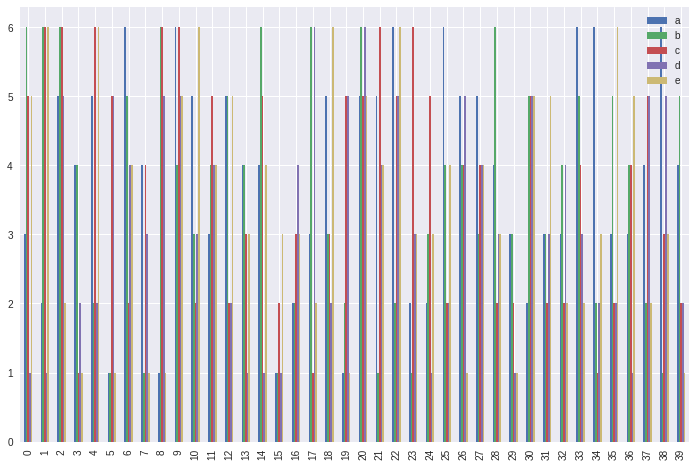

In [92]:
df.plot.bar()

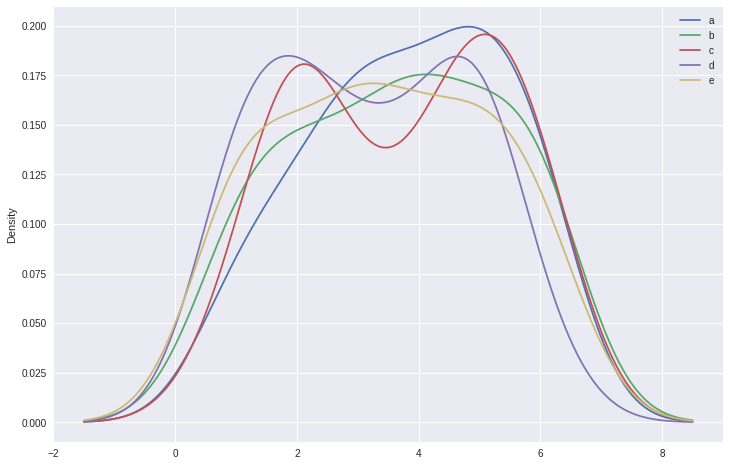

In [93]:
df.plot(kind="density")

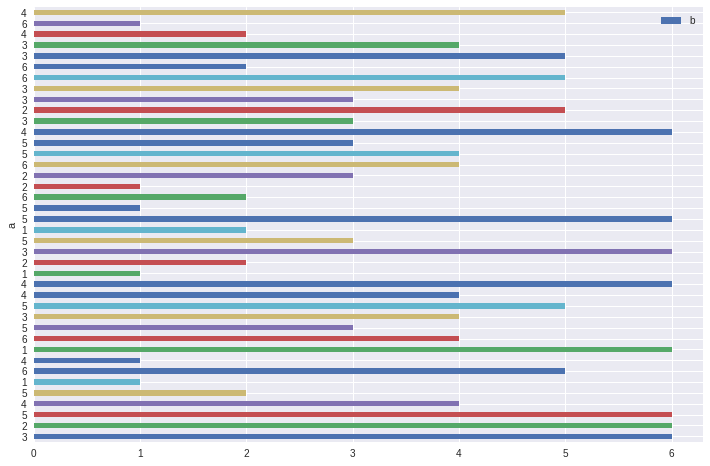

In [94]:
df.plot.barh(x="a", y="b")

## Sauvegarde.chargement fichier

**Remarque** on utilise la fonction magique `%ls` pour voir l'état du dossier courant.

In [95]:
%ls

Introduction.ipynb  seance/


In [96]:
df.to_csv("test.csv")

In [97]:
%ls

Introduction.ipynb  seance/  test.csv


In [98]:
df.to_json("test.json")

In [99]:
%ls

Introduction.ipynb  seance/  test.csv  test.json


**Commentaire** on sauvegarde via les méthodes commençant par `to_` la fin dépendant du format de fichier voulu. Pour charger les données on utilise les fonctions `read_`.

In [100]:
df_bis = pd.read_csv("test.csv")
df_bis.head()

,Unnamed: 0,a,b,c,d,e
0,0,3,6,5,1,5
1,1,2,6,6,1,6
2,2,5,6,6,5,2
3,3,4,4,1,2,1
4,4,5,2,6,2,6


In [103]:
df_bis.columns

Index(['Unnamed: 0', 'a', 'b', 'c', 'd', 'e'], dtype='object')

In [104]:
df_bis.columns[0]

'Unnamed: 0'

In [108]:
df_bis.drop(axis=1, labels=df_bis.columns[0]).head()

,a,b,c,d,e
0,3,6,5,1,5
1,2,6,6,1,6
2,5,6,6,5,2
3,4,4,1,2,1
4,5,2,6,2,6
